# Trabalho A2 de Álgebra Linear 


### Ana Júlia Amaro Pereira Rocha
### Maria Eduarda Mesquita Magalhães

### **Curso: Ciência de Dados e Inteligência Artificial / 2º período**

### **Tema**: Aplicação de mínimos quadrados com intuito de fazer uma regressão linear nos dados de um Data Frame

#### Em Álgebra Linear, aprendemos que nem sempre um sistema linear possui soluções, especialmente quando tem-se mais equações do que incógnitas. Desse modo, uma forma de "resolver" tal problema é usando o método dos mínimos quadrados, no qual encontramos uma reta que melhor minimiza o erro no conjunto de dados. Logo, o objetivo desse trabalho é justamente analisar duas colunas da base de dados, em cada gráfico plotado, buscando entender a relação entre tais colunas. Com isso, chegaremos a conclusões sobre o tema do Data Frame a partir do uso de álgebra linear em seus dados.

In [64]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

##### Observação: Talvez seja possível e de grande valia para nossa análise o uso dessa base do sono junto com a outra base analisada. O r² score da análise seguinte é de 95%.

In [65]:
# Reading data from csv and dropping null values
# df = pd.read_csv("Sleep_Efficiency.csv").dropna()

# Creating x and y vectors with values from the Deep sleep percentage and Light sleep percentage columns
# the reshape fit the values in a two-dimensional array for future multiplications
# x = df["Deep sleep percentage"].values.reshape(-1,1) 
# y = df["Light sleep percentage"].values

In [66]:
# Reading data from csv and dropping null values
df = pd.read_csv("dailyactivity_v3.csv").dropna()

# plt.scatter(x,y, alpha=0.3)
# plt.boxplot([x,y])


# Identification of the ID column so as not to modify this column later
coluna_id = "Id"

# Selection of numeric columns, except the ID column
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
colunas_numericas = colunas_numericas.drop(coluna_id)

# MinMaxScaler initialization
scaler = MinMaxScaler()

# Normalization of all numeric columns
for coluna in colunas_numericas:
    df[coluna] = scaler.fit_transform(df[[coluna]])


# Visualization of normalized data
print(df.head)

# code to check if all values in the database are normalized
'''
lista = []
for coluna in colunas_numericas:
    for valor in df[coluna].values:
        if valor < 0 or valor > 1:
            lista.append((coluna, valor)) 

print(lista)
'''

# Creating x and y vectors with values from the database's columns

# x = df["TotalMinutesActive"].values.reshape(-1,1)   # to use it we need to explain the reason for the concentration of data at the end of the graph
# y = df["SedentaryMinutes"].values

x1 = df["LightlyActiveMinutes"].values.reshape(-1,1)
y1 = df["LightActiveDistance"].values

x2 = df["FairlyActiveMinutes"].values.reshape(-1,1)
y2 = df["ModeratelyActiveDistance"].values

x3 = df["VeryActiveMinutes"].values.reshape(-1,1)
y3 = df["VeryActiveDistance"].values

<bound method NDFrame.head of              Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366    4/12/2016    0.365418       0.303247         0.303247   
1    1503960366    4/13/2016    0.298037       0.248662         0.248662   
2    1503960366    4/14/2016    0.290402       0.240457         0.240457   
3    1503960366    4/15/2016    0.271024       0.224046         0.224046   
4    1503960366    4/16/2016    0.351731       0.291117         0.291117   
..          ...          ...         ...            ...              ...   
935  8877689391     5/8/2016    0.296677       0.289333         0.289333   
936  8877689391     5/9/2016    0.561537       0.651088         0.651088   
937  8877689391    5/10/2016    0.297982       0.290760         0.290760   
938  8877689391    5/11/2016    0.594686       0.697824         0.697824   
939  8877689391    5/12/2016    0.223882       0.218337         0.218337   

     LoggedActivitiesDistance  VeryActiveDistance  Modera

#### Para os próximos blocos de código, deve-se levar em conta algo que aprendemos em Álgebra Linear, ou seja, que quando Ax=b for inconsistente, sua solução com mínimos quadrados minimizará ||Ax - b||² e isso é feito por meio das chamadas "equações normais" $ A^T A \hat{x} = A^T b $.
#### Tendo isso em mente, vamos explicar aos poucos o que estamos fazendo em cada bloco de código. No caso da linha seguinte, estamos adicionando uma coluna de uns na matriz bidimensional com valores x (valores da coluna "Deep sleep percentage"). Essa adição é feita para representar o termo linear, considerando que temos $ Xc = y $ onde **c** é um vetor coluna com os coeficientes **b** e **a**, respectivamente, de $ b + ax = y $ (equação linear geral) e $y$ é o vetor definido anteriormente com dados da coluna "Light sleep percentage".
#### $ Xc = y =>    \begin{bmatrix}  1 & x_{1} \\ 1 & x_{2} \\  \vdots & \vdots \\  1 & x_{m} \\   \end{bmatrix}   \begin{bmatrix}  b \\ a \end{bmatrix} = \begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{m} \\ \end{bmatrix} $

In [67]:
# Adding a column of 1s to represent the linear term
X_1 = np.column_stack([np.ones_like(x1), x1])
X_2 = np.column_stack([np.ones_like(x2), x2])
X_3 = np.column_stack([np.ones_like(x3), x3])

#### Agora, observe que no nosso caso $ A^T A \hat{x} = A^T b $ torna-se $ X^T X \hat{c} = X^T y $ sendo $ \hat{c} $ a solução procurada, ou seja, o vetor com os coeficientes de uma equação linear que melhor representa os dados em questão. 
#### Outro ponto notório que aprendemos em Álgebra Linear é que $ X^T X $ será inversível exatamente quando as colunas de $X$ forem linearmente independentes (LI) e, dessa maneira, o melhor c estimado seria $ c = (X^T X)^{-1} X^T y$.
#### Logo, como a matriz X possui apenas duas colunas, sendo uma com todas as entradas iguais a 1 e a outra com valores "aleatórios" de "Deep sleep percentage" da base de dados usada, temos que essas colunas são LI, já que uma coluna tem todos os valores iguais e a outra não, então não há um valor que multiplicando a coluna 1 encontremos a coluna 2.
#### Portanto, podemos usar a expressão $ \hat{c} = (X^T X)^{-1} X^T y $ para encontrar o vetor solução $ \hat{c} $  .

In [68]:
# Fitting the linear regression using matrix solution
coefficients_1 = np.linalg.inv(X_1.T @ X_1) @ X_1.T @ y1
coefficients_2 = np.linalg.inv(X_2.T @ X_2) @ X_2.T @ y2
coefficients_3 = np.linalg.inv(X_3.T @ X_3) @ X_3.T @ y3

# Angular and linear coefficients
l1_coeff, a1_coeff = coefficients_1
l2_coeff, a2_coeff = coefficients_2
l3_coeff, a3_coeff = coefficients_3

In [69]:
# Model's prediction
y1_pred = X_1 @ coefficients_1
y2_pred = X_2 @ coefficients_2
y3_pred = X_3 @ coefficients_3

# r² coefficient, used to check the accuracy of linear regression
r2_1 = r2_score(y1, y1_pred)
print(f"1-R² Score: {r2_1:.4f}")

r2_2 = r2_score(y2, y2_pred)
print(f"2-R² Score: {r2_2:.4f}")

r2_3 = r2_score(y3, y3_pred)
print(f"2-R² Score: {r2_3:.4f}")

1-R² Score: 0.7845
2-R² Score: 0.8967
2-R² Score: 0.6834


Text(0, 0.5, 'Light Active Distance')

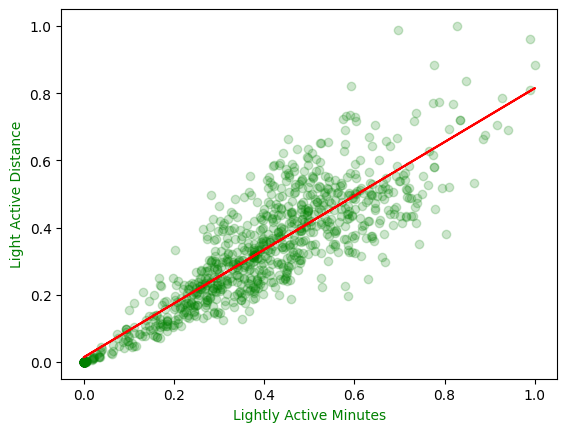

In [70]:
# Plotting 1
plt.scatter(x1, y1, alpha=0.2, color="green")
plt.plot(x1, l1_coeff + a1_coeff*x1, color="red") # line representing linear regression

plt.xlabel("Lightly Active Minutes", color="green")
plt.ylabel("Light Active Distance", color="green")


# This line is to represent an specific point on the graph when necessary or important
# plt.scatter(0, l_coeff + a_coeff*2.5, color='lightgreen', s = 20) 

{'whiskers': [<matplotlib.lines.Line2D at 0x291b25db190>,
 'caps': [<matplotlib.lines.Line2D at 0x291b25e4310>,
 'boxes': [<matplotlib.lines.Line2D at 0x291b25da910>,
 'medians': [<matplotlib.lines.Line2D at 0x291b25e5550>,
 'fliers': [<matplotlib.lines.Line2D at 0x291b25e5cd0>,
 'means': []}

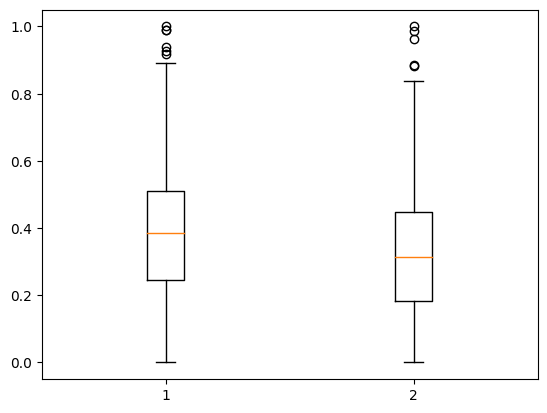

In [71]:
# code just to check the data's concentration at the beginning of the graph 1
x1 = df["LightlyActiveMinutes"].values
y1 = df["LightActiveDistance"].values
plt.boxplot([x1,y1])

Text(0, 0.5, 'Moderately Active Distance')

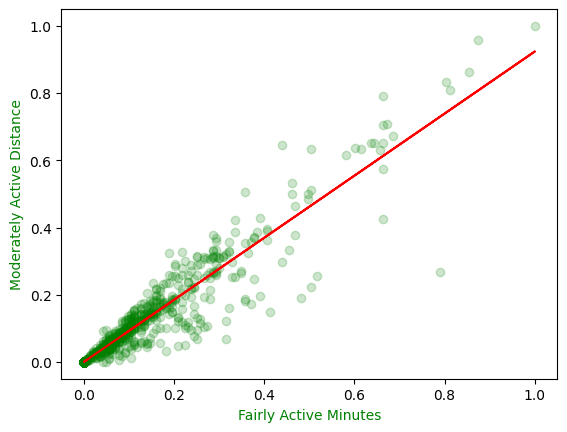

In [72]:
# Plotting 2

plt.scatter(x2, y2, alpha=0.2, color="green")
plt.plot(x2, l2_coeff + a2_coeff*x2, color="red")

plt.xlabel("Fairly Active Minutes", color="green")
plt.ylabel("Moderately Active Distance", color="green")

{'whiskers': [<matplotlib.lines.Line2D at 0x291b26c8a50>,
 'caps': [<matplotlib.lines.Line2D at 0x291b26c9d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x291b26c82d0>,
 'medians': [<matplotlib.lines.Line2D at 0x291b26cae90>,
 'fliers': [<matplotlib.lines.Line2D at 0x291b26cb6d0>,
 'means': []}

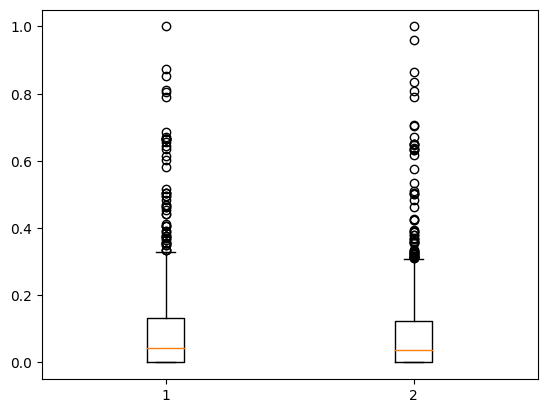

In [73]:
# code just to check the data's concentration at the beginning of the graph 2
x2 = df["FairlyActiveMinutes"].values
y2 = df["ModeratelyActiveDistance"].values
plt.boxplot([x2,y2])

Text(0, 0.5, 'Very Active Distance')

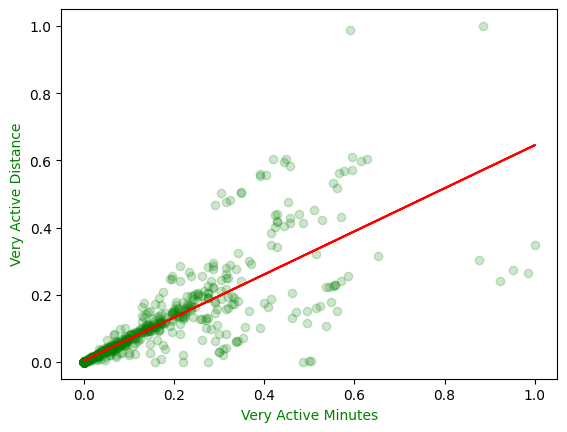

In [74]:
# Plotting 3

plt.scatter(x3, y3, alpha=0.2, color="green")
plt.plot(x3, l3_coeff + a3_coeff*x3, color="red")

plt.xlabel("Very Active Minutes", color="green")
plt.ylabel("Very Active Distance", color="green")

{'whiskers': [<matplotlib.lines.Line2D at 0x291b277f550>,
 'caps': [<matplotlib.lines.Line2D at 0x291b27b0550>,
 'boxes': [<matplotlib.lines.Line2D at 0x291b279e950>,
 'medians': [<matplotlib.lines.Line2D at 0x291b27b1710>,
 'fliers': [<matplotlib.lines.Line2D at 0x291b279ff90>,
 'means': []}

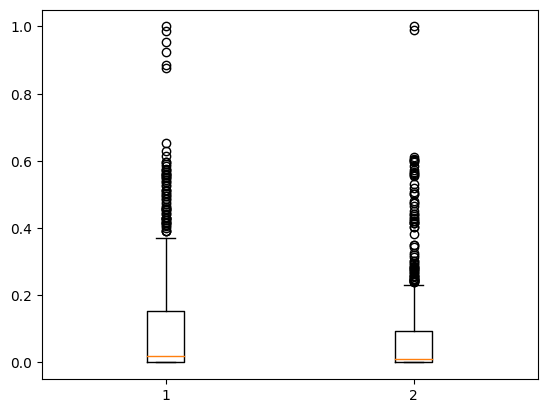

In [75]:
# code just to check the data's concentration at the beginning of the graph 2
x3 = df["VeryActiveMinutes"].values
y3 = df["VeryActiveDistance"].values

plt.boxplot([x3,y3])